In [1]:
import h5py
from scipy.stats import poisson
from scipy.special import factorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/dneise/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
ls

crosstalk_thoughts.ipynb                 performance_of_correction.png
crosstalk_vs_rate.jpg                    plots_from_jens/
foo.png                                  poisson_correction.ipynb
foo.svg                                  README.md
formula_foo.png                          single_pe_data_check.hdf
gedankenexperiment_with_crosstalk.ipynb  single_pe_spectra.hdf
papers/                                  Untitled2.ipynb


In [3]:
input_file_path = "single_pe_data_check.hdf"

In [4]:
with h5py.File(input_file_path) as f:
    keys = list(f.keys())
    print(*keys, sep=" | ")

Baseline | Chi2 | CoeffR | Crosstalk | FitProb | Gain | Noise | NormGain | Pxtalk | Rate | RelSigma


In [5]:
df = pd.read_hdf(input_file_path, key='Rate')

R = pd.read_hdf(input_file_path, key='Rate')[[x for x in range(1440)]]
p = pd.read_hdf(input_file_path, key='Pxtalk')[[x for x in range(1440)]]
nu = pd.read_hdf(input_file_path, key='CoeffR')[[x for x in range(1440)]]
p_xt = pd.read_hdf(input_file_path, key='Crosstalk')[[x for x in range(1440)]]

In [6]:
len(R)

1395

In [7]:
t_0 = 7e-9  # the effective integration window. We could somehow get this number from data, I think...
Nmax = 13

In [8]:
mu = R * 1e6 * t_0
q = p * np.exp(-p)

In [9]:
P_mu = poisson.pmf(k=np.arange(0, Nmax)[:, None, None], mu=mu)

In [10]:
def calc_Pn(N, q, nu):
    Ns = np.atleast_1d(N)
    result = np.zeros((len(N), q.shape[0], q.shape[1]))
    for i, N in enumerate(Ns):
         result[i] = (q*N)**(N-1) / (factorial(N-1))**nu
    return result

In [11]:
Ns = np.arange(1, Nmax+1)
Pn = calc_Pn(Ns, q, nu)

In [12]:
Pn.shape, P_mu.shape

((13, 1395, 1440), (13, 1395, 1440))

In [13]:
Pn /= Pn.sum(axis=0)

In [14]:
P_prime_n = Pn - P_mu

In [15]:
p_xt

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
fRunStart,,,,,,,,,,,,,,,,,,,,,
2013-08-25 20:25:24,0.140046,0.128432,0.125551,0.132306,0.131690,0.146003,0.146630,0.140554,0.131349,0.157689,...,0.160097,0.158471,0.154501,0.143124,0.157122,0.155071,0.142840,0.154885,0.152156,0.160755
2013-08-25 20:27:41,0.144071,0.131008,0.130698,0.134032,0.132765,0.148283,0.145885,0.138156,0.132553,0.157224,...,0.159790,0.161117,0.155638,0.140491,0.161149,0.154956,0.146942,0.159913,0.157465,0.161468
2013-08-30 20:20:33,0.150690,0.132733,0.128249,0.137502,0.134170,0.151441,0.159238,0.146951,0.141611,0.173137,...,0.168897,0.170423,0.168996,0.145877,0.168679,0.163380,0.149416,0.165617,0.166158,0.169247
2013-08-30 20:22:50,0.151848,0.133589,0.133550,0.140724,0.136520,0.150239,0.155656,0.147004,0.139100,0.169420,...,0.164034,0.172174,0.162768,0.150085,0.163028,0.164319,0.150072,0.167708,0.166235,0.169767
2013-08-30 20:25:07,0.149859,0.132187,0.131839,0.135604,0.139193,0.153004,0.155178,0.142429,0.134580,0.168425,...,0.165855,0.169891,0.163371,0.150360,0.166597,0.166725,0.151118,0.168176,0.168295,0.166807
2013-09-04 20:23:24,0.148033,0.132708,0.126773,0.133836,0.130157,0.145678,0.149007,0.141628,0.134287,0.167475,...,0.165143,0.164340,0.158444,0.142897,0.166028,0.157878,0.146648,0.161182,0.160135,0.167796
2013-09-04 20:26:42,0.142093,0.133812,0.133636,0.131877,0.132036,0.147033,0.148726,0.139708,0.135148,0.160013,...,0.159977,0.165889,0.161381,0.145005,0.163732,0.161023,0.147136,0.162012,0.158128,0.162909
2013-09-04 20:29:59,0.142396,0.130220,0.122894,0.129939,0.130495,0.146318,0.150635,0.140036,0.130781,0.163245,...,0.156526,0.159527,0.158164,0.139829,0.164805,0.159968,0.144435,0.157087,0.159682,0.161034
2013-09-05 20:20:24,0.143832,0.132666,0.124611,0.129452,0.127760,0.143793,0.148410,0.140560,0.131348,0.156828,...,0.155508,0.153752,0.151890,0.139319,0.159108,0.149217,0.144481,0.157387,0.154258,0.157049


In [16]:
p_xt_from_Pns = Pn[1:].sum(axis=0)

In [17]:
delta_p_xt = p_xt_from_Pns - p_xt

In [18]:
# in these pixels p_xt from the Pn is not really equal to p_xt we read from the root files
np.where((delta_p_xt > 1e-6).iloc[0])

(array([], dtype=int64),)

In [19]:
(q == 0).sum().sum()

21675

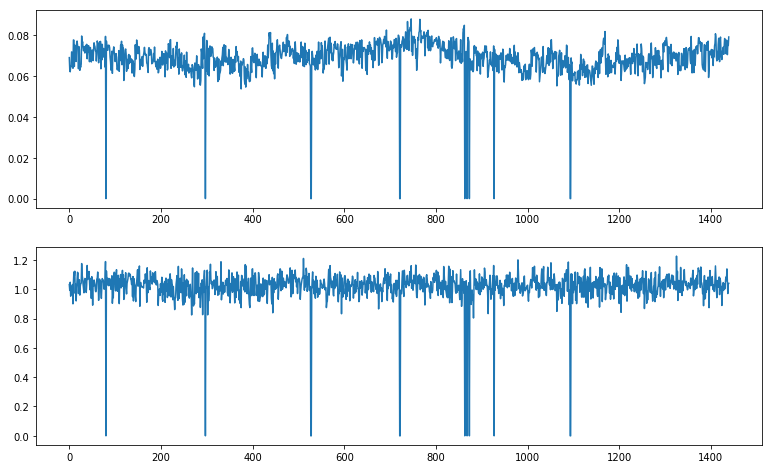

In [20]:
fig, axes = plt.subplots(2, figsize=(13, 8))
axes[0].plot(q.iloc[0])
axes[1].plot(nu.iloc[0]);

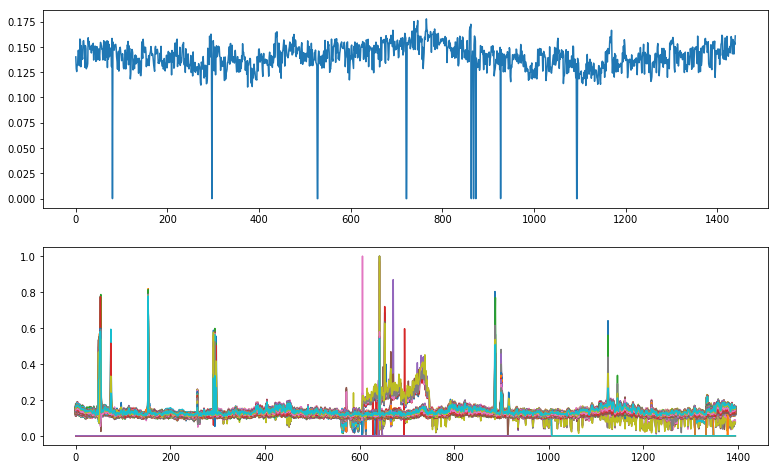

In [21]:
fig, axes = plt.subplots(2, figsize=(13, 8))
axes[0].plot(p_xt.iloc[0])
axes[1].plot(p_xt_from_Pns);

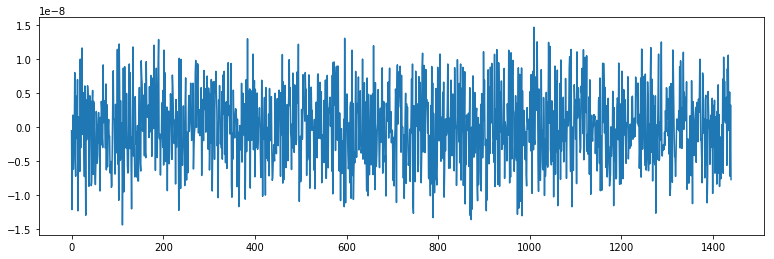

In [22]:
plt.figure(figsize=(13, 4))
plt.plot(delta_p_xt.iloc[0]);

(4.232010728545214e-11, 5.431902390347707e-09)

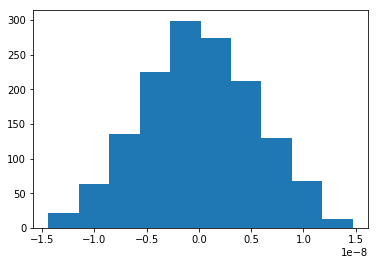

In [23]:
plt.hist(delta_p_xt.iloc[0]);
delta_p_xt.iloc[0].mean(), delta_p_xt.iloc[0].std()

In [24]:
p_ct_corrected = P_prime_n[1:].sum(axis=0) / Pn.sum(axis=0)
p_ct_corrected

array([[0.0981373 , 0.09692333, 0.09524967, ..., 0.10372991, 0.10417216,
        0.11058728],
       [0.10221497, 0.09925116, 0.10046319, ..., 0.10823609, 0.10851022,
        0.11039782],
       [0.10293033, 0.09632536, 0.09230377, ..., 0.10779601, 0.11183078,
        0.11202882],
       ...,
       [0.09327286, 0.08940372, 0.08662332, ..., 0.10302302, 0.10261709,
        0.10865945],
       [0.0882896 , 0.08828632, 0.08862029, ..., 0.10069226, 0.10044725,
        0.10419691],
       [0.0911562 , 0.08827787, 0.0883658 , ..., 0.09913287, 0.10225648,
        0.10497413]])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

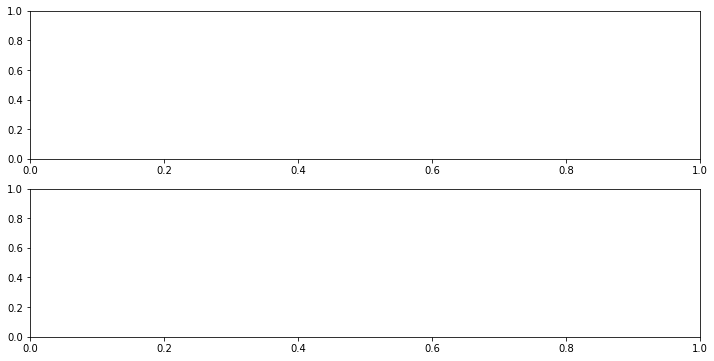

In [25]:
fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0].bar(Ns, Pn[:, 0], log=True, label='Pn')
ax[0].bar(Ns, P_mu[:, 0], log=True, label='P_mu')
ax[0].legend()

ax[1].bar(Ns, P_prime_n[:, 0], label="P'_n")
ax[1].legend()
plt.title("Pixel 0");

In [26]:
p_xt.values[:, 0]

array([0.140046  , 0.1440706 , 0.15069041, ..., 0.13989051, 0.12819603,
       0.13510974])

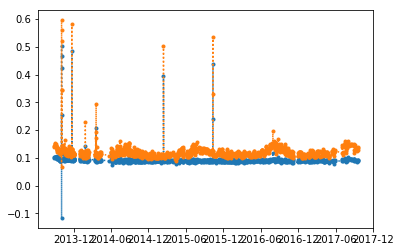

In [27]:
plt.plot(df.index, p_ct_corrected[:, 0], '.:')
plt.plot(df.index, p_xt.values[:, 0], '.:');